## Set Up Dependencies and Data


In [1]:
import joblib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm


In [2]:
slip_df = pd.read_csv("https://osf.io/ftb8m/download")
baseline_df = pd.read_csv("https://osf.io/zfkvm/download")


## Reproducibility


In [3]:
%load_ext watermark
%watermark -iwbmuvg -iv


Last updated: 2025-06-15T11:59:00.884501+00:00

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.32.0

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.11.0-1015-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Git hash: 8bb8951dda7b2ad9707f33024a3a27305e71fc21

Git branch: main

pandas    : 2.2.3
seaborn   : 0.13.2
joblib    : 1.3.2
numpy     : 2.2.2
matplotlib: 3.10.0

Watermark: 2.4.3



In [4]:
joblib.hash(slip_df)


'8b26bd2bdb19bd31284ceb2f054518d1'

In [5]:
joblib.hash(baseline_df)


'aa54a1ed83c544fc164b3cd3963cb62e'

# Preprocess data


In [6]:
slip_df["condition"] = "slip"
baseline_df["condition"] = "baseline"

df = pd.concat([slip_df, baseline_df])


In [7]:
df["Task Coding Sites"] = df["Task Coding Sites"].apply(eval)


In [8]:
df["Run ID"] = df["Unnamed: 0"].apply(lambda x: x.split(",")[0])
df["Task"] = df["Unnamed: 0"].apply(lambda x: x.split(",")[1])


In [9]:
df["Genome Site"] = df["Genome"].apply(list)


In [10]:
tidy_df = df.explode("Genome Site")
tidy_df


,Unnamed: 0,Task Coding Sites,Number of Task Coding Sites,Number of Unique Coding Sites,Viability Sites,Number of Viability Sites,Genome Length,Fraction Task Coding Sites,Fraction Viability Sites,Ratio of Viability Sites to Coding Sites,Genome,condition,Run ID,Task,Genome Site
0,"run_1593,NOT","[50, 52, 56, 69, 74, 81, 85, 91]",8,45,"[16, 60, 77, 78, 82, 83, 136, 137, 138, 139, 1...",28,161,0.279503,0.173913,0.622222,pplbttjklijAzbzawnieqeuonyycucucAcycoucscfkjbo...,slip,run_1593,NOT,p
0,"run_1593,NOT","[50, 52, 56, 69, 74, 81, 85, 91]",8,45,"[16, 60, 77, 78, 82, 83, 136, 137, 138, 139, 1...",28,161,0.279503,0.173913,0.622222,pplbttjklijAzbzawnieqeuonyycucucAcycoucscfkjbo...,slip,run_1593,NOT,p
0,"run_1593,NOT","[50, 52, 56, 69, 74, 81, 85, 91]",8,45,"[16, 60, 77, 78, 82, 83, 136, 137, 138, 139, 1...",28,161,0.279503,0.173913,0.622222,pplbttjklijAzbzawnieqeuonyycucucAcycoucscfkjbo...,slip,run_1593,NOT,l
0,"run_1593,NOT","[50, 52, 56, 69, 74, 81, 85, 91]",8,45,"[16, 60, 77, 78, 82, 83, 136, 137, 138, 139, 1...",28,161,0.279503,0.173913,0.622222,pplbttjklijAzbzawnieqeuonyycucucAcycoucscfkjbo...,slip,run_1593,NOT,b
0,"run_1593,NOT","[50, 52, 56, 69, 74, 81, 85, 91]",8,45,"[16, 60, 77, 78, 82, 83, 136, 137, 138, 139, 1...",28,161,0.279503,0.173913,0.622222,pplbttjklijAzbzawnieqeuonyycucucAcycoucscfkjbo...,slip,run_1593,NOT,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,"run_1554,EQUALS",[],0,38,"[0, 3, 4, 5, 6, 86, 95, 99]",8,100,0.380000,0.080000,0.210526,wpbjagctblavyaAaujuyctcqbqjljbutawawyaybcuycta...,baseline,run_1554,EQUALS,x
269,"run_1554,EQUALS",[],0,38,"[0, 3, 4, 5, 6, 86, 95, 99]",8,100,0.380000,0.080000,0.210526,wpbjagctblavyaAaujuyctcqbqjljbutawawyaybcuycta...,baseline,run_1554,EQUALS,v
269,"run_1554,EQUALS",[],0,38,"[0, 3, 4, 5, 6, 86, 95, 99]",8,100,0.380000,0.080000,0.210526,wpbjagctblavyaAaujuyctcqbqjljbutawawyaybcuycta...,baseline,run_1554,EQUALS,v
269,"run_1554,EQUALS",[],0,38,"[0, 3, 4, 5, 6, 86, 95, 99]",8,100,0.380000,0.080000,0.210526,wpbjagctblavyaAaujuyctcqbqjljbutawawyaybcuycta...,baseline,run_1554,EQUALS,v


### Absolute Instruction Abundances


<Axes: xlabel='Genome Site', ylabel='count'>

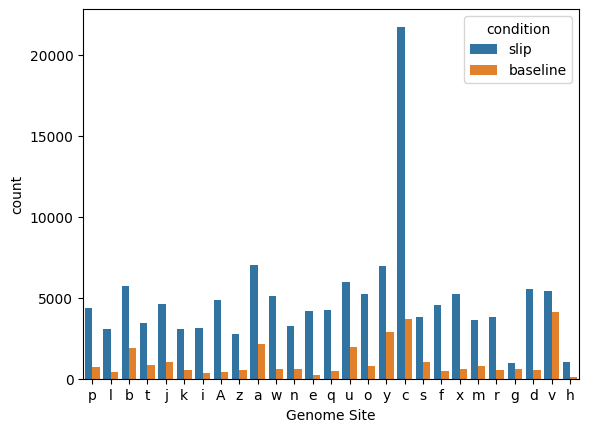

In [11]:
sns.countplot(
    data=tidy_df,
    x="Genome Site",
    hue="condition",
)


In [12]:
count_df = (
    tidy_df.groupby(["Run ID", "condition", "Genome Site"]).size().reset_index()
)
count_df[0] /= count_df.groupby(["Run ID", "condition"])[0].transform("sum")
count_df


,Run ID,condition,Genome Site,0
0,run_1530,baseline,A,0.010000
1,run_1530,baseline,a,0.120000
2,run_1530,baseline,b,0.040000
3,run_1530,baseline,c,0.140000
4,run_1530,baseline,d,0.020000
...,...,...,...,...
1530,run_1619,slip,v,0.043364
1531,run_1619,slip,w,0.040736
1532,run_1619,slip,x,0.043364
1533,run_1619,slip,y,0.040736


## Relative Instruction Abundances


<Axes: xlabel='Genome Site', ylabel='0'>

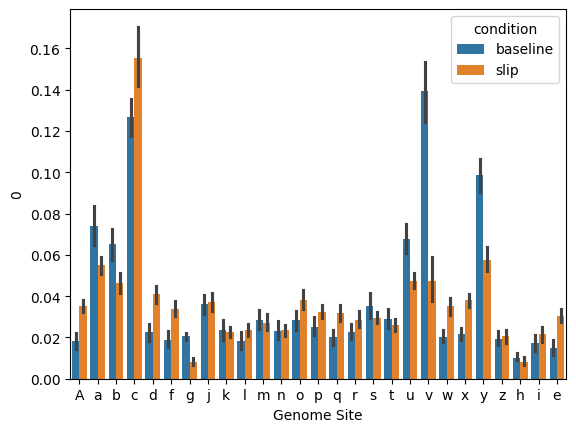

In [13]:
sns.barplot(
    data=count_df,
    x="Genome Site",
    hue="condition",
    y=0,
)
